In [1]:
import glob
import numpy as np
import fuvpy as fuv
import matplotlib.pyplot as plt
from polplot import pp

import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning) # Turn of all the warnings when np.where contains NaNs.

Import the sample images and remove background emissions

In [2]:
path = '../sample_wicfiles/'
wicfiles = glob.glob(path + '*.idl')
wic = fuv.read_idl(wicfiles,dzalim=75)
wic = wic.fuv.backgroundmodel_BS(tOrder=0).fuv.backgroundmodel_SH(3,3,tOrder=0)

The auroral boundaries are first detected along 24 latitudinal meridians

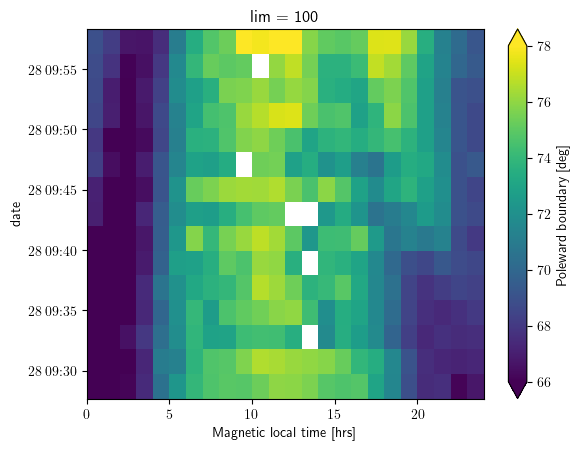

In [3]:
bi = wic.fuv.detect_boundaries()
bi['pb'].sel(lim=100).plot(vmin=66,vmax=78)

The initial boundaries are used to make models of the boundary locations. The main model is based on B-splines in longitude and time

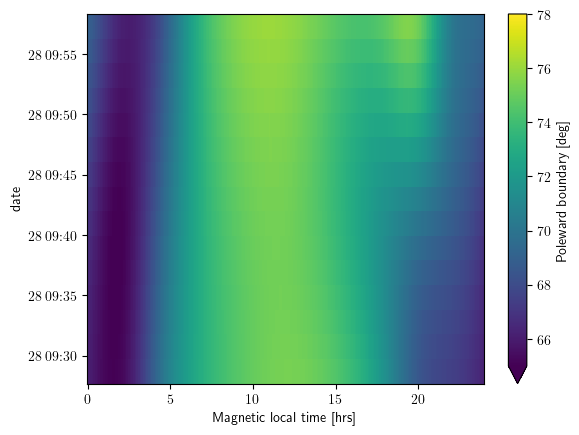

In [4]:
bmBS = bi.fuv.boundarymodel_BS(tLeb=1e0,tLpb=1e0)
bmBS['pb'].plot(vmin=65,vmax=78)

There is also an alternative model based on Fourier series in longitude and B-splines in time

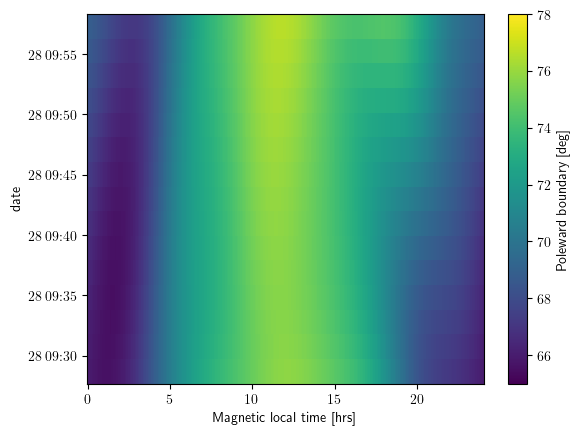

In [5]:
bmF = bi.fuv.boundarymodel_F(tLeb=1e0,tLpb=1e0,Leb=1e0,Lpb=1e0)
bmF['pb'].plot(vmin=65,vmax=78)

The temporal evolution of the boundaries can be shown in polar coordinates

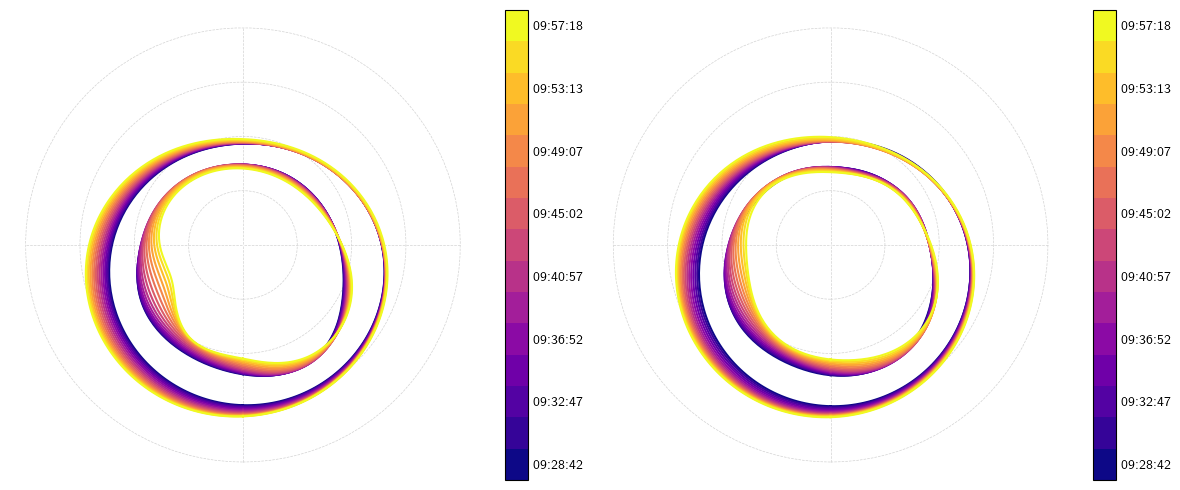

In [6]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
pax0 = pp(axs[0])
fuv.plotboundaries(bmBS,'pb',pax=pax0,cmap='plasma')
fuv.plotboundaries(bmBS,'eb',pax=pax0,cmap='plasma',add_cbar=False)
pax1 = pp(axs[1])
fuv.plotboundaries(bmF,'pb',pax=pax1,cmap='plasma')
fuv.plotboundaries(bmF,'eb',pax=pax1,cmap='plasma',add_cbar=False)

The boundary models can be plotted together with the input images to visually verify the performance. 

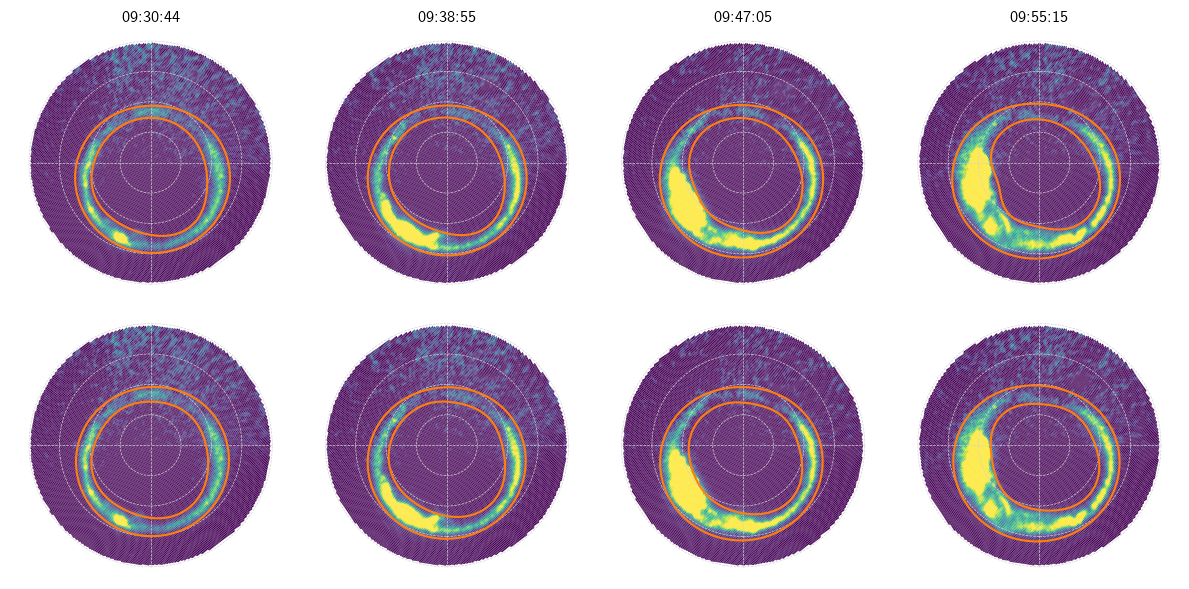

In [7]:
idates = [1,5,9,13]

fig,axs = plt.subplots(2,4,figsize=(12,6))

for i in range(2):
    for j in range(4):
        pax=pp(axs[i,j])
        fuv.plotimg(wic.isel(date=idates[j]),'shimg',pax=pax,crange=(0,1500))
        if i == 0:
            pax.plot(bmBS['pb'].isel(date=idates[j]),bmBS.mlt,color='C1')
            pax.plot(bmBS['eb'].isel(date=idates[j]),bmBS.mlt,color='C1')
            pax.ax.set_title(wic.isel(date=idates[j])['date'].dt.strftime('%H:%M:%S').values.tolist())
        elif i == 1:
            pax.plot(bmF['pb'].isel(date=idates[j]),bmF.mlt,color='C1')
            pax.plot(bmF['eb'].isel(date=idates[j]),bmF.mlt,color='C1')

fig.tight_layout()


The models coherently provide boundary locations and velocities. Here is the northward component of the boundary normal velocity from the two different models:

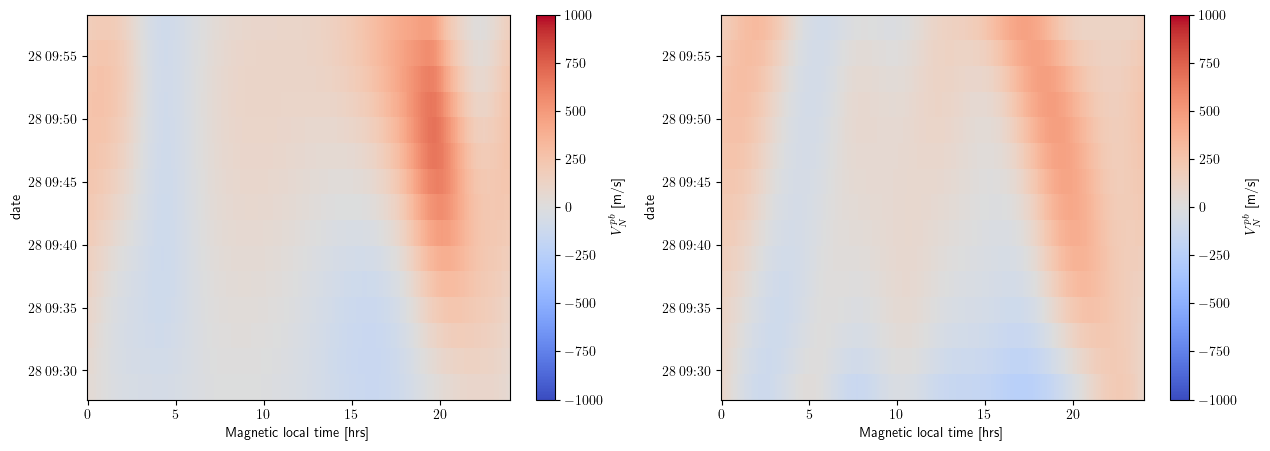

In [8]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
bmBS['vn_pb'].plot(ax=axs[0],vmin=-1000,vmax=1000,cmap='coolwarm')
bmF['vn_pb'].plot(ax=axs[1],vmin=-1000,vmax=1000,cmap='coolwarm')

The models analytically provide the flux content per longitude. The totals are obtained by summing over all local times. 

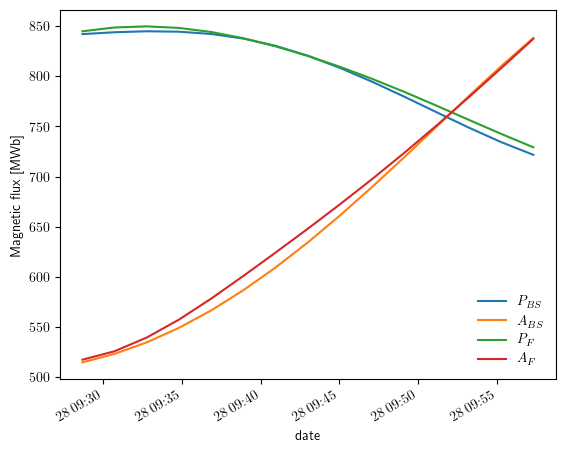

In [9]:
bmBS['P'] = 1e-6*np.deg2rad(15*0.1)*bmBS['dP'].sum(dim='mlt')
bmBS['A'] = 1e-6*np.deg2rad(15*0.1)*bmBS['dA'].sum(dim='mlt')
bmF['P'] = 1e-6*np.deg2rad(15*0.1)*bmF['dP'].sum(dim='mlt')
bmF['A'] = 1e-6*np.deg2rad(15*0.1)*bmF['dA'].sum(dim='mlt')
fig,ax=plt.subplots()
bmBS['P'].plot(ax=ax)
bmBS['A'].plot(ax=ax)
bmF['P'].plot(ax=ax)
bmF['A'].plot(ax=ax)

ax.set_ylabel('Magnetic flux [MWb]')
ax.legend(['$P_{BS}$','$A_{BS}$','$P_{F}$','$A_{F}$'],frameon=False)